In [1]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

584

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | biograd na moru
Processing Record 4 of Set 1 | san quintin
Processing Record 5 of Set 1 | umm lajj
Processing Record 6 of Set 1 | ruteng
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | rio gallegos
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hofn
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | ambovombe
Processing Record 17 of Set 1 | kokoda
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | neuquen
Processing Record 21 of Set 1 | igarka
Processing Record 22 of Set 1 | barrow


Processing Record 35 of Set 4 | pitimbu
Processing Record 36 of Set 4 | nagapattinam
Processing Record 37 of Set 4 | saint-prosper
Processing Record 38 of Set 4 | jiayuguan
Processing Record 39 of Set 4 | namatanai
Processing Record 40 of Set 4 | hobart
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | yatou
Processing Record 43 of Set 4 | coahuayana
Processing Record 44 of Set 4 | buchanan
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | hirara
Processing Record 48 of Set 4 | shakiso
Processing Record 49 of Set 4 | mugur-aksy
Processing Record 50 of Set 4 | mogadishu
Processing Record 1 of Set 5 | birobidzhan
Processing Record 2 of Set 5 | sisimiut
Processing Record 3 of Set 5 | adeje
Processing Record 4 of Set 5 | kashi
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | palu
Processing Record 7 of Set 5 | northam
Processing Record 8

Processing Record 21 of Set 8 | nioro
Processing Record 22 of Set 8 | kilkis
Processing Record 23 of Set 8 | xinyang
Processing Record 24 of Set 8 | broome
Processing Record 25 of Set 8 | ayagoz
Processing Record 26 of Set 8 | kudahuvadhoo
Processing Record 27 of Set 8 | pangody
Processing Record 28 of Set 8 | mayo
Processing Record 29 of Set 8 | ugoofaaru
Processing Record 30 of Set 8 | arlit
Processing Record 31 of Set 8 | bay roberts
Processing Record 32 of Set 8 | naze
Processing Record 33 of Set 8 | loksa
Processing Record 34 of Set 8 | buritis
Processing Record 35 of Set 8 | teluknaga
Processing Record 36 of Set 8 | wrzesnia
Processing Record 37 of Set 8 | shima
Processing Record 38 of Set 8 | parrita
Processing Record 39 of Set 8 | north bend
Processing Record 40 of Set 8 | amot
Processing Record 41 of Set 8 | arawa
Processing Record 42 of Set 8 | chabahar
Processing Record 43 of Set 8 | tahta
Processing Record 44 of Set 8 | kropotkin
Processing Record 45 of Set 8 | iqaluit
Proc

Processing Record 11 of Set 12 | azimur
City not found. Skipping...
Processing Record 12 of Set 12 | oussouye
Processing Record 13 of Set 12 | nezhinka
Processing Record 14 of Set 12 | ixtapa
Processing Record 15 of Set 12 | lazaro cardenas
Processing Record 16 of Set 12 | valparaiso
Processing Record 17 of Set 12 | katsuura
Processing Record 18 of Set 12 | lyaskelya
Processing Record 19 of Set 12 | dongsheng
Processing Record 20 of Set 12 | yenagoa
Processing Record 21 of Set 12 | kulu
Processing Record 22 of Set 12 | la rioja
Processing Record 23 of Set 12 | kahului
Processing Record 24 of Set 12 | saint-marc
Processing Record 25 of Set 12 | grindavik
Processing Record 26 of Set 12 | balikpapan
Processing Record 27 of Set 12 | luanda
Processing Record 28 of Set 12 | tostamaa
City not found. Skipping...
Processing Record 29 of Set 12 | ambilobe
Processing Record 30 of Set 12 | tulle
Processing Record 31 of Set 12 | smila
Processing Record 32 of Set 12 | kawalu
Processing Record 33 of 

In [6]:
len(city_data)

529

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,48.18,40,0,3.44,US,2022-03-23 18:39:21
1,Yellowknife,62.4560,-114.3525,13.41,86,100,9.22,CA,2022-03-23 18:35:02
2,Biograd Na Moru,43.9433,15.4519,47.10,61,0,8.46,HR,2022-03-23 18:43:27
3,San Quintin,30.4833,-115.9500,71.46,45,0,7.52,MX,2022-03-23 18:42:30
4,Umm Lajj,25.0213,37.2685,65.14,44,0,18.07,SA,2022-03-23 18:43:28
5,Ruteng,-8.6136,120.4721,62.67,92,100,0.92,ID,2022-03-23 18:43:28
6,Constitucion,-35.3333,-72.4167,60.03,54,6,13.00,CL,2022-03-23 18:43:29
7,Port Alfred,-33.5906,26.8910,74.16,72,100,6.24,ZA,2022-03-23 18:43:29
8,Hermanus,-34.4187,19.2345,70.81,88,100,8.66,ZA,2022-03-23 18:42:33
9,Rio Gallegos,-51.6226,-69.2181,48.25,71,75,4.61,AR,2022-03-23 18:43:30


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-03-23 18:39:21,41.3712,-73.4140,48.18,40,0,3.44
1,Yellowknife,CA,2022-03-23 18:35:02,62.4560,-114.3525,13.41,86,100,9.22
2,Biograd Na Moru,HR,2022-03-23 18:43:27,43.9433,15.4519,47.10,61,0,8.46
3,San Quintin,MX,2022-03-23 18:42:30,30.4833,-115.9500,71.46,45,0,7.52
4,Umm Lajj,SA,2022-03-23 18:43:28,25.0213,37.2685,65.14,44,0,18.07
5,Ruteng,ID,2022-03-23 18:43:28,-8.6136,120.4721,62.67,92,100,0.92
6,Constitucion,CL,2022-03-23 18:43:29,-35.3333,-72.4167,60.03,54,6,13.00
7,Port Alfred,ZA,2022-03-23 18:43:29,-33.5906,26.8910,74.16,72,100,6.24
8,Hermanus,ZA,2022-03-23 18:42:33,-34.4187,19.2345,70.81,88,100,8.66
9,Rio Gallegos,AR,2022-03-23 18:43:30,-51.6226,-69.2181,48.25,71,75,4.61


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1648064440.9230125

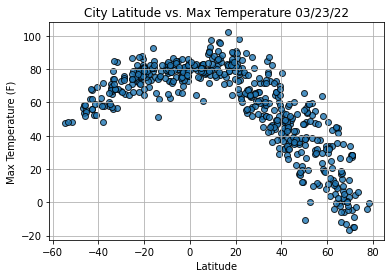

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

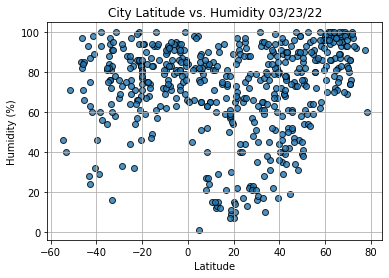

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

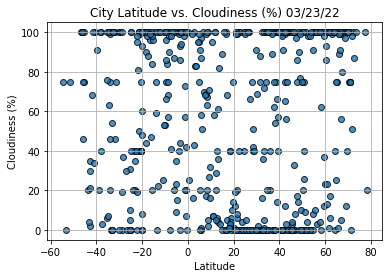

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

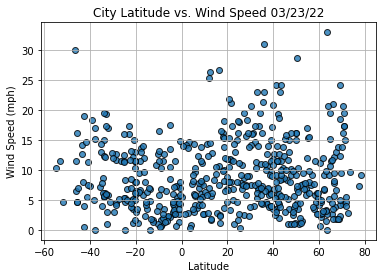

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                    Hithadhoo
Country                        MV
Date          2022-03-23 18:43:31
Lat                          -0.6
Lng                       73.0833
Max Temp                    83.64
Humidity                       66
Cloudiness                      0
Wind Speed                  14.83
Name: 13, dtype: object

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

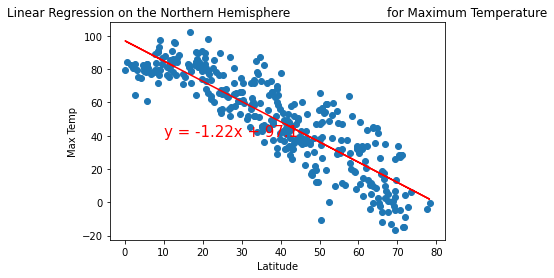

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

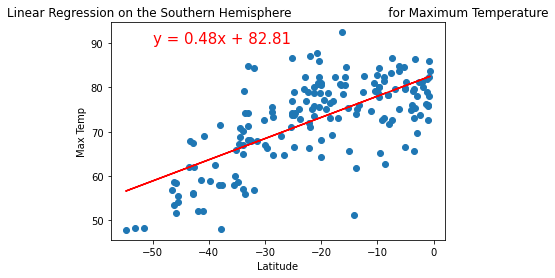

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

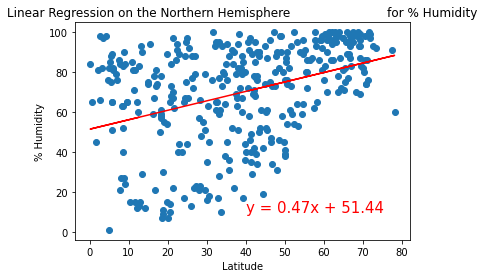

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

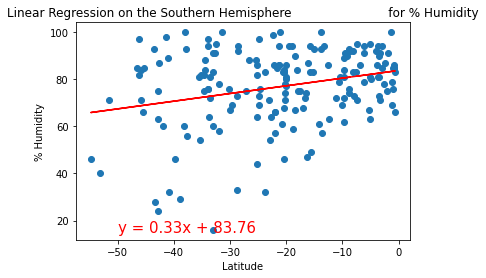

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

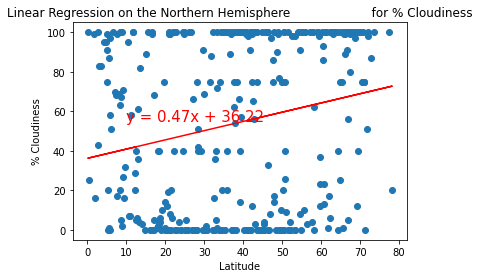

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

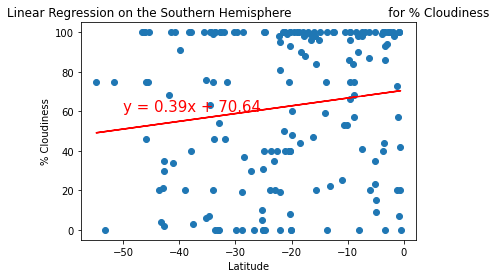

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

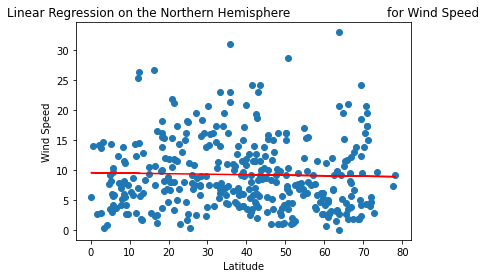

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

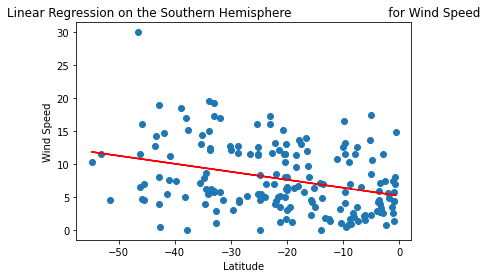

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))